In [2]:
import socnet as sn
from random import random
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
years = ['1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968']
graphs = []

for y in years:
    g = sn.load_graph('graphs/'+y+'.gml')
    graphs.append(g)

In [4]:
#calculate number of musicians and sessions p/ year

total_musicians = []

for g in graphs:
    total_musicians.append(g.number_of_nodes())

In [5]:
#calculate number of innovations p/ year

total_sessions = []

for y in years:
    s = 0
    
    for line in open('sessions/'+y+'.txt'):
        s+=1
    
    total_sessions.append(s)

In [6]:
#calc. mean_degree of the nodes for each graph

mean_degree_list = []

for g in graphs: 
    mean_sum=0

    for n in g.nodes():
        mean_sum += g.degree(n) 

    mean_degree = mean_sum/g.number_of_nodes() 
    mean_degree_list.append(mean_degree)

In [7]:
#calc. std. deviation of the nodes for each graph

dp_list = []

for g in graphs:
    temp = 0
    for n in g.nodes():
        temp = (g.degree(n)-mean_degree)**2

    dp = temp/g.number_of_nodes() 
    dp_list.append(dp)

In [8]:
#calc. clustering coefficient and average distance for each graph

rcc = []
rad = []

for g in graphs:
    rcc.append(sn.average_clustering_coefficient(g))
    rad.append(sn.average_distance(g))

In [9]:
#calc. smallworldness

q_list = []

def generate_random_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)

    nodes = list(g.nodes)

    for i in range(num_nodes):
        n = nodes[i]

        for j in range(i + 1, num_nodes):
            m = nodes[j]

            if random() < c / num_nodes:
                g.add_edge(n, m)

    return g

index = 0
for g in graphs:
    rg = generate_random_graph(g.number_of_nodes(), mean_degree_list[index])
    cc = sn.average_clustering_coefficient(rg)
    ad = sn.average_distance(rg)
    
    q = (rcc[index]/cc)/(rad[index]/ad)
    q_list.append(q)
    
    index+=1

In [10]:
#calculate number of innovations p/ year

total_innovations = []

for y in years:
    s = 0
    
    for line in open('innovations.txt'):
        if line in open('sessions/'+y+'.txt'):
            s+=1
    
    total_innovations.append(s)

In [11]:
#calculate number of innovations percentage p/ year

pc_total_innovations = []

for i in range(len(total_innovations)):
    pc_total_innovations.append(total_innovations[i]/total_sessions[i]) 

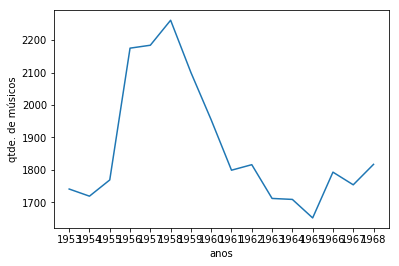

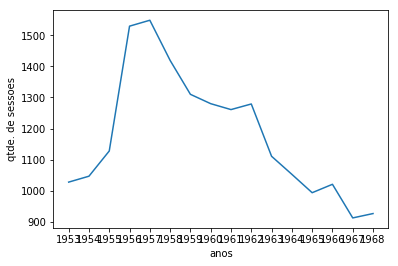

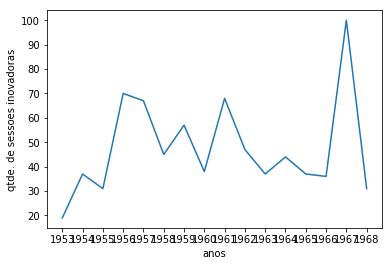

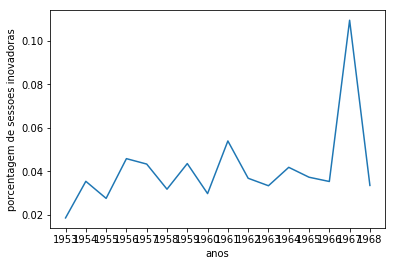

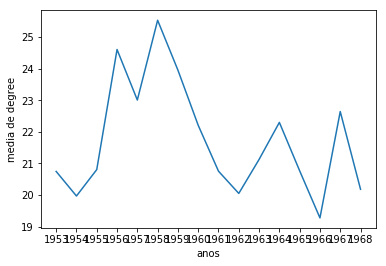

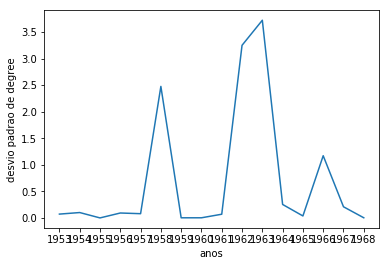

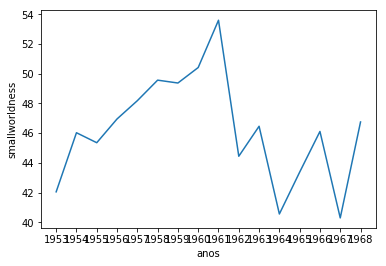

In [12]:
plt.plot(years, total_musicians)
plt.xlabel("anos")
plt.ylabel("qtde. de músicos")
plt.show()

plt.plot(years, total_sessions)
plt.xlabel("anos")
plt.ylabel("qtde. de sessoes")
plt.show()

plt.plot(years, total_innovations)
plt.xlabel("anos")
plt.ylabel("qtde. de sessoes inovadoras")
plt.show()

plt.plot(years, pc_total_innovations)
plt.xlabel("anos")
plt.ylabel("porcentagem de sessoes inovadoras")
plt.show()

plt.plot(years, mean_degree_list)
plt.xlabel("anos")
plt.ylabel("media de degree")
plt.show()

plt.plot(years, dp_list)
plt.xlabel("anos")
plt.ylabel("desvio padrao de degree")
plt.show()

plt.plot(years, q_list)
plt.xlabel("anos")
plt.ylabel("smallworldness")
plt.show()